In [1]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense ,Conv2D, MaxPooling2D, Input, Flatten 
from tensorflow.keras.layers import  UpSampling2D, Reshape ,Activation
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#data dowland 
(real_x_train, _) , (real_x_test, __) = cifar10.load_data()
x_train = real_x_train
x_test = real_x_test
#preprocesing
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
print("x train shape :",x_train.shape)
print("x test shape :",x_test.shape)

x train shape : (50000, 32, 32, 3)
x test shape : (10000, 32, 32, 3)


In [13]:
#model encoder
input_img_size_encoder = Input(shape =(32, 32, 3))

x = Conv2D(64 , (3,3) , padding = "same")(input_img_size_encoder)
x = Activation("relu")(x)
x = MaxPooling2D((2,2), padding = "same")(x)

x = Conv2D(32 , (3,3), padding = "same")(x)
x = Activation("relu")(x)
x = MaxPooling2D((2,2) ,padding = "same")(x)

x = Conv2D(16, (3,3), padding = "same")(x)
x = Activation("relu")(x)
x = MaxPooling2D((2,2), padding = "same")(x)

x = Flatten()(x)
encoded = Dense(4*4*16)(x) #latent space

In [14]:
#model decoder
x = Reshape((4,4,16) , input_shape = (4*4*16,))(encoded)#latent space
x = UpSampling2D((2,2))(x)# 8,8,16
x = Conv2D(16 , (3,3) , padding = "same" , activation = "relu")(x)

x = UpSampling2D((2,2))(x) # 16,16,32
x = Conv2D(32 , (3,3) , padding = "same" , activation = "relu")(x)

x = UpSampling2D((2,2))(x) # 32,32,64                 
x = Conv2D(64 , (3,3) , padding = "same" , activation = "relu")(x) 

decoded = Conv2D(3 , (3,3) , padding = "same" , activation = "sigmoid")(x) 

In [15]:
#model autoencoder and encoder
autoencoder = Model(input_img_size_encoder , decoded, name = "autoencoder")
encoder  = Model(input_img_size_encoder , encoded , name = "encoder")

In [16]:
#load weights
autoencoder.load_weights("autoencoder_weights.h5")
encoder.load_weights("encoder_weights.h5")

In [17]:
#predict 
decoded = autoencoder.predict(x_test)
encoder_predict = encoder.predict(x_test)

Real data


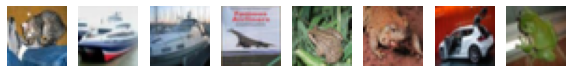

Predict data


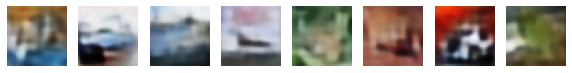

In [24]:
#real data Visualize
print("Real data")
plt.figure(figsize = (10,10))
for  i in range(8):
    plt.subplot(1,8 , i+1)
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.axis("off")
plt.show()  

#predict data Visualize
print("Predict data")
plt.figure(figsize = (10,10))
for  i in range(8):
    plt.subplot(1,8 , i+1)
    plt.imshow(decoded[i].reshape(32,32,3))
    plt.axis("off")
plt.show() 

Encoder predict


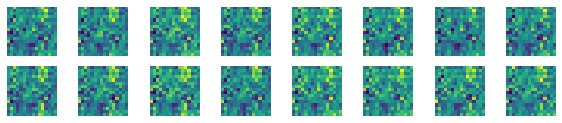

In [30]:
#encoder visualize(feature extraction)
print("Encoder predict")
plt.figure(figsize = (10,2))
for  i in range(16):
    plt.subplot(2,8 , i+1)
    plt.imshow(encoder_predict[i].reshape(16,16,1))
    plt.axis("off")
plt.show() 